# Actividad Final

#### Importaciones de librerias

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import requests


#### Defincion de funciones

In [91]:
def importarDatosDeArchivoCSV(csv_file_path):
    try:
        datos = pd.read_csv(csv_file_path)
        return datos
    except FileNotFoundError:
        print(f"Error: El archivo en la ruta '{csv_file_path}' no se encontró.")
        return None
    except pd.errors.EmptyDataError:
        print("Error: El archivo está vacío.")
        return None
    except pd.errors.ParserError:
        print("Error: Error al parsear el archivo CSV.")
        return None
    except Exception as e:
        print(f"Ocurrió un error inesperado: {e}")
        return None   

def ValidarAnnoDigitado():
    print('Digite un año entre 2017 y 2021:')
    entrada = input()
    numero = int(entrada)
    if(numero not in range(2017,2022)):
        raise TypeError("El valor debe estar entre 2017 y 2021")
    return numero

#### Obtencion de datos de crimenes por provincia en CSV

Los datos provienen del siguiente informe encontrado en el sitio [Crime in Costa Rica from 2017 to 21 oct 2021](https://www.kaggle.com/datasets/lrvdcr/crime-in-costa-rica-from-2017-to-21-oct-2021/suggestions?status=pending&yourSuggestions=true) publicados por Luis Rodolfo Valverde Delgado

#### Definicion de Datos de Crimenes Por Provincia Canton 

In [92]:
datosCrimenes = importarDatosDeArchivoCSV('stats.csv')

# Convertir la columna Date a formato datetime
datosCrimenes['Date'] = pd.to_datetime(datosCrimenes['Date'])
datosCrimenes['Year'] = datosCrimenes['Date'].dt.year
datosCrimenes['Month'] = datosCrimenes['Date'].dt.month
datosCrimenes['Day'] = datosCrimenes['Date'].dt.day
datosCrimenes['ProvCanton'] = datosCrimenes['Province'] + ',' + datosCrimenes['Canton']

#### Agrupar los datos por Año, Provincia y Cantón, y contar el número de incidentes

In [93]:
grouped_data = datosCrimenes.groupby(['Year', 'Month', 'Province', 'Canton']).size().reset_index(name='Count')
display(grouped_data)

,Year,Month,Province,Canton,Count
0,2017,1,ALAJUELA,ALAJUELA,301
1,2017,1,ALAJUELA,ATENAS,8
2,2017,1,ALAJUELA,GRECIA,53
3,2017,1,ALAJUELA,GUATUSO,7
4,2017,1,ALAJUELA,LOS CHILES,17
...,...,...,...,...,...
4915,2021,10,SAN JOSE,SANTA ANA,26
4916,2021,10,SAN JOSE,TARRAZU,6
4917,2021,10,SAN JOSE,TIBAS,25
4918,2021,10,SAN JOSE,TURRUBARES,3


Digite un año entre 2017 y 2021:


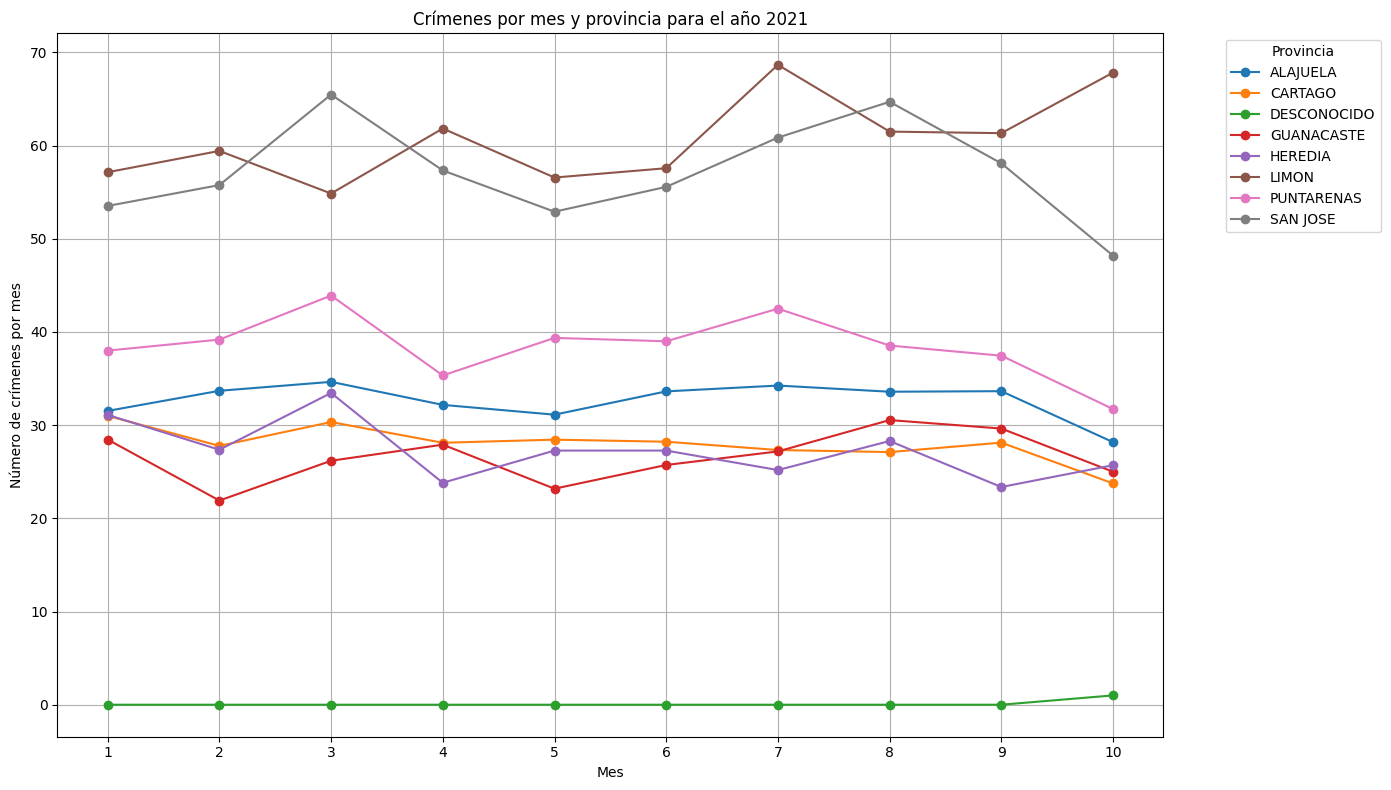

In [94]:
# Agrupar los datos por Año y Provincia, y contar el número de incidentes

try:
    numero = ValidarAnnoDigitado()
    grupoProvinciaPorAnno = datosCrimenes[datosCrimenes['Year'] == numero].groupby(['Year', 'Month', 'Province', 'Canton']).size().reset_index(name='Count')

    # Pivotar los datos para tener una columna por cada provincia
    tablaPivoteMesProvincia = grupoProvinciaPorAnno.pivot_table(index='Month', columns='Province', values='Count', fill_value=0)
    
    # Generar la gráfica de línea
    plt.figure(figsize=(14, 8))
    
    for column in tablaPivoteMesProvincia.columns:
        tablaPivoteMesProvincia[column].plot(kind='line', marker='o', label=column)
    
    plt.title('Crímenes por mes y provincia para el año '+ str(numero))
    plt.xlabel('Mes')
    plt.ylabel('Número de crímenes por mes')
    plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(tablaPivoteMesProvincia.index)
    plt.grid(True)
    plt.tight_layout()
    
    # Mostrar la gráfica
    plt.show()
except ValueError:
    print("La entrada no es un número entero válido")
except TypeError as e:
    print(e)


### Mostrar la evolucion de los crimenes en una provincia 

Lista de provincias
['ALAJUELA' 'SAN JOSE' 'CARTAGO' 'GUANACASTE' 'LIMON' 'HEREDIA'
 'PUNTARENAS' 'DESCONOCIDO']
Digite una provincia:


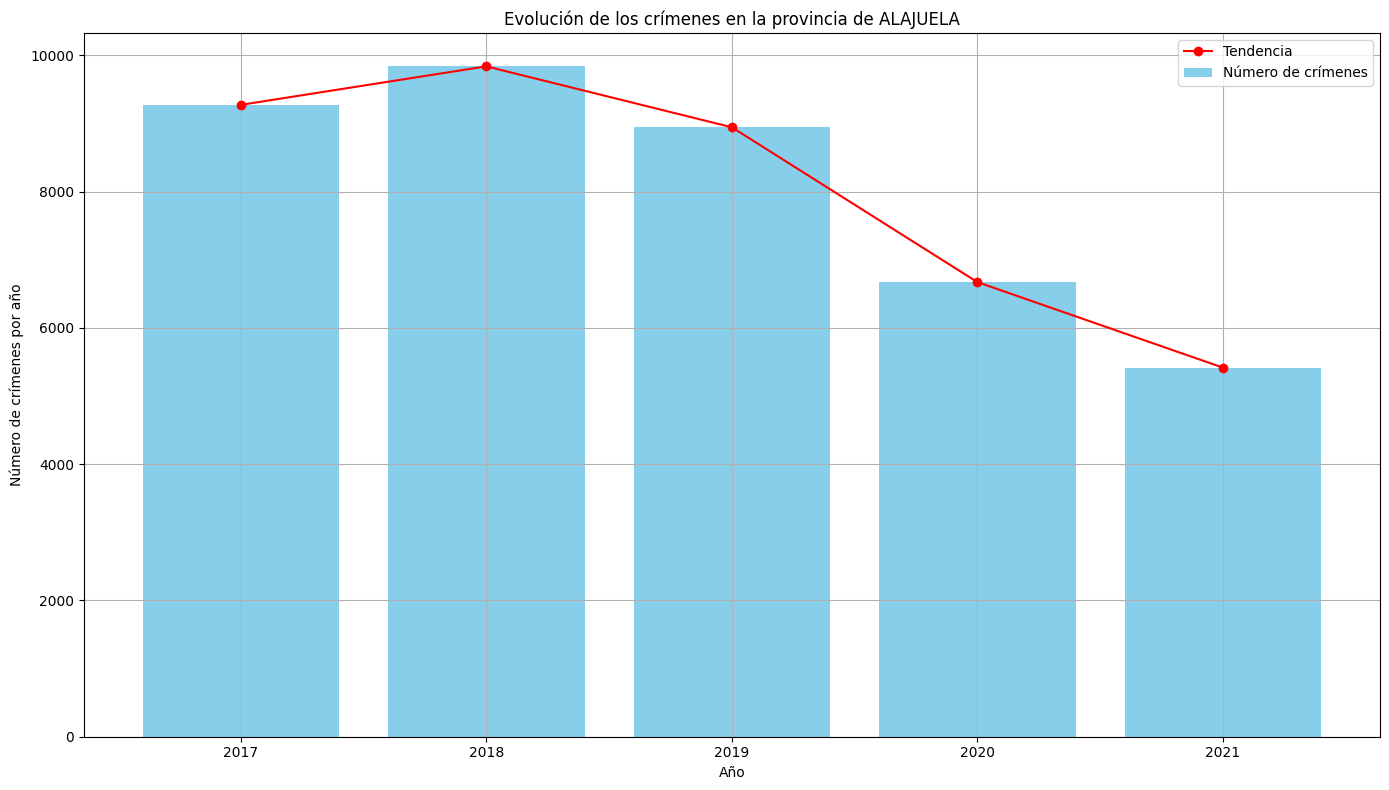

In [95]:
# Mostrar la evolucion de los crimenes en una provincia 
print('Lista de provincias')
provincias = datosCrimenes['Province'].unique()
print(provincias)

print('Digite una provincia:')
entrada = input()

try:
    
    
    if(entrada not in provincias):
       
        raise TypeError("El valor de estar entre la lista ")
    grupoProvinciaPorAnno2 = datosCrimenes[datosCrimenes['Province'] == entrada].groupby(['Year', 'Province']).size().reset_index(name='Count')
    
    # Generar la gráfica de barras
    plt.figure(figsize=(14, 8))
    plt.bar(grupoProvinciaPorAnno2['Year'], grupoProvinciaPorAnno2['Count'], color='skyblue', label='Número de crímenes')

    # Superponer la línea sobre las barras
    
    plt.plot(grupoProvinciaPorAnno2['Year'], grupoProvinciaPorAnno2['Count'], marker='o', color='red', label='Tendencia')
    plt.title('Evolución de los crímenes en la provincia de ' + entrada)
    plt.xlabel('Año')
    plt.ylabel('Número de crímenes por año')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Mostrar la gráfica
    plt.show()
except TypeError as e:
    print(e)

### Funcion para leer archivos SAV (archivos de datos de SPSS)

Los archivos de datos de IBM® SPSS® Statistics son archivos formateados específicamente para que los utilice IBM SPSS Statistics, que contienen tanto los datos como los metadatos (diccionario) que definen los datos.

Los datos provienenn del [Catalogo Central de Datos de la INEC](http://sistemas.inec.cr/pad5/index.php/catalog/central#_r=1716600981192&collection=&country=&dtype=&from=2001&page=1&ps=&sid=&sk=desempleo&sort_by=rank&sort_order=desc&to=2025&topic=&view=s&vk=)

In [96]:
# Función para importar datos desde un archivo .sav
def importarDatosDeArchivoSAV(rutaArchivoSAV):
    try:
        datos = pd.read_spss(rutaArchivoSAV)
        #print(datos)
        return datos
    except FileNotFoundError:
        print(f"Error: El archivo en la ruta '{rutaArchivoSAV}' no se encontró.")
        return None
    except Exception as e:
        print(f"Ocurrió un error inesperado al leer archivo {rutaArchivoSAV}. Error: {e} ")
        return None

Para el poder obtener toda la informacion de los SV en una sola estructura se requiere instalar la siguiente libreria

`pip install pandas pyreadstat`

In [97]:
import os
import glob

pyreadEstatInstalado = False

try:
    import pyreadstat
except ImportError:
    print("Error: La biblioteca 'pyreadstat' no está instalada. Instálala usando 'pip install pyreadstat'.")
    pyreadEstatInstalado = False
else:
    pyreadEstatInstalado = True
nombreCarpeta = "Encuesta INEC 2017-2022- Empleo"

#### Funcion de descarga de archivos

In [105]:
def DescargarArchivo(url, nombreArchivo):
    respuesta = requests.get(url)
    if not os.path.exists(nombreCarpeta):
        os.makedirs(nombreCarpeta)
        print(f"Carpeta creada: {nombreCarpeta}")
    
    rutaCompleta = os.path.join(nombreCarpeta, nombreArchivo)
    if respuesta.status_code == 200:
        with open(rutaCompleta, 'wb') as f:
            f.write(respuesta.content)
        print(f"Archivo descargado correctamente: {nombreArchivo}")
    else:
        print(f"Error al descargar el archivo: {respuesta.status_code}, {nombreArchivo}")

def borrarArchivos(nombreArchivo):
    rutaCompleta = os.path.join(nombreCarpeta, nombreArchivo)
    try:
        os.remove(rutaCompleta)
        print(f"Archivo {nombreArchivo} borrado correctamente.")
    except FileNotFoundError:
        print(f"El archivo {nombreArchivo} no existe.")
    except Exception as e:
        print(f"Error al borrar el archivo {nombreArchivo}: {e}")

    

#### Lista de archivos a descargar

In [107]:

import json

archivosPorDescargar = [
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/I%20Trimestre%202017.sav", "FileName":"I Trimestre 2017 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/I%20Trimestre%202018.sav", "FileName":"I Trimestre 2018 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/I%20Trimestre%202019.sav", "FileName":"I Trimestre 2019 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/I%20Trimestre%202020.sav", "FileName":"I Trimestre 2020 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/I%20Trimestre%202021.sav", "FileName":"I Trimestre 2021 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/I%20Trimestre%202022.sav", "FileName":"I Trimestre 2022 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/II%20Trimestre%202017.sav", "FileName":"II Trimestre_2017 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/II%20Trimestre%202018F.sav", "FileName":"II Trimestre_2018F Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/II%20Trimestre%202019.sav", "FileName":"II Trimestre 2019 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/II%20Trimestre%202020.sav", "FileName":"II Trimestre 2020 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/II%20Trimestre%202021.sav", "FileName":"II Trimestre 2021 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/II%20Trimestre%202022.sav", "FileName":"II Trimestre 2022 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/III%20Trimestre%202017.sav", "FileName":"III Trimestre 2017 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/III%20Trimestre%202018.sav", "FileName":"III Trimestre 2018 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/III%20Trimestre%202019.sav", "FileName":"III Trimestre 2019 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/III%20Trimestre%202020.sav", "FileName":"III Trimestre 2020 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/III%20Trimestre%202021.sav", "FileName":"III Trimestre 2021 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/III%20Trimestre%202022.sav", "FileName":"III Trimestre 2022 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/IV%20Trimestre%202017.sav", "FileName":"IV Trimestre 2017 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/IV%20Trimestre%202018.sav", "FileName":"IV Trimestre 2018 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/IV%20Trimestre%202019.sav", "FileName":"IV Trimestre 2019 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/IV%20Trimestre%202020.sav", "FileName":"IV Trimestre 2020 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/IV%20Trimestre%202021.sav", "FileName":"IV Trimestre 2021 Downloaded.sav" },
    { "url": "https://github.com/Jonamora91/PythonIAActividadFinal/raw/main/Encuesta%20INEC%202017-2019-%20Empleo/IV%20Trimestre%202022.sav", "FileName":"IV Trimestre 2022 Downloaded.sav" },
]

#### Realizar la descarga de los archivos

In [108]:
def descargarListaArchivos(archivos):
    for archivo in archivos:
        url = archivo["url"]
        file_name = archivo["FileName"]
        DescargarArchivo(url, file_name)

descargarListaArchivos(archivosPorDescargar)

Carpeta creada: Encuesta INEC 2017-2019- Empleo
Archivo descargado correctamente: I Trimestre 2017 Downloaded.sav
Archivo descargado correctamente: I Trimestre 2018 Downloaded.sav
Archivo descargado correctamente: I Trimestre 2019 Downloaded.sav
Archivo descargado correctamente: I Trimestre 2020 Downloaded.sav
Archivo descargado correctamente: I Trimestre 2021 Downloaded.sav
Archivo descargado correctamente: I Trimestre 2022 Downloaded.sav
Archivo descargado correctamente: I Trimestre 2023 Downloaded.sav
Archivo descargado correctamente: II Trimestre_2017 Downloaded.sav
Archivo descargado correctamente: II Trimestre_2018F Downloaded.sav
Archivo descargado correctamente: II Trimestre 2019 Downloaded.sav
Archivo descargado correctamente: II Trimestre 2020 Downloaded.sav
Archivo descargado correctamente: II Trimestre 2021 Downloaded.sav
Archivo descargado correctamente: II Trimestre 2022 Downloaded.sav
Archivo descargado correctamente: III Trimestre 2017 Downloaded.sav
Archivo descargado 

In [109]:

# Función para recorrer una carpeta y cargar todos los archivos .sav en un solo DataFrame
def cargarTodosLosArchivosSAVEnDataset(rutaArchivosSav):
    if not pyreadEstatInstalado:
        print("No se pueden cargar los archivos .sav porque 'pyreadstat' no está instalado.")
        return None
    
    listaDataframes = []
    for archivoSav in glob.glob(os.path.join(rutaArchivosSav, '*.sav')):
        print(f"Importando datos desde: {archivoSav}")
        df = importarDatosDeArchivoSAV(archivoSav)
        if df is not None and not df.empty:
            df = df.dropna(how='all')
            listaDataframes.append(df)
    
    if listaDataframes:
        datosCombinados = pd.concat(listaDataframes, ignore_index=True)
        return datosCombinados
    else:
        print("No se encontraron archivos .sav o no se pudieron importar los datos.")
        return None


#### Datos de Empleabilidad segun el INEC entre el año 2017 y 2022

In [110]:
from IPython.display import display
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
datosEmpleo = cargarTodosLosArchivosSAVEnDataset(nombreCarpeta)

pd.set_option('display.max_columns', None)

if datosEmpleo is not None:
    print(f"Datos combinados importados con éxito. Cantidad de datos: {len(datosEmpleo)}"  )
else:
    print("No se pudieron importar y combinar los datos.")

def borrarListaArchivos(archivos):
    for archivo in archivos:
        nombreArchivo = archivo["FileName"]
        borrarArchivos(nombreArchivo)

borrarListaArchivos(archivosPorDescargar)

Importando datos desde: Encuesta INEC 2017-2019- Empleo\I Trimestre 2017 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2019- Empleo\I Trimestre 2018 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2019- Empleo\I Trimestre 2019 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2019- Empleo\I Trimestre 2020 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2019- Empleo\I Trimestre 2021 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2019- Empleo\I Trimestre 2022 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2019- Empleo\I Trimestre 2023 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2019- Empleo\II Trimestre 2019 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2019- Empleo\II Trimestre 2020 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2019- Empleo\II Trimestre 2021 Downloaded.sav
Importando datos desde: Encuesta INEC 2017-2019- Empleo\II Trimestre 2022 Downloaded.sav
Importando datos desde: Encu

Porcentaje de desempleo entre 2017 y 2021: 5.40%


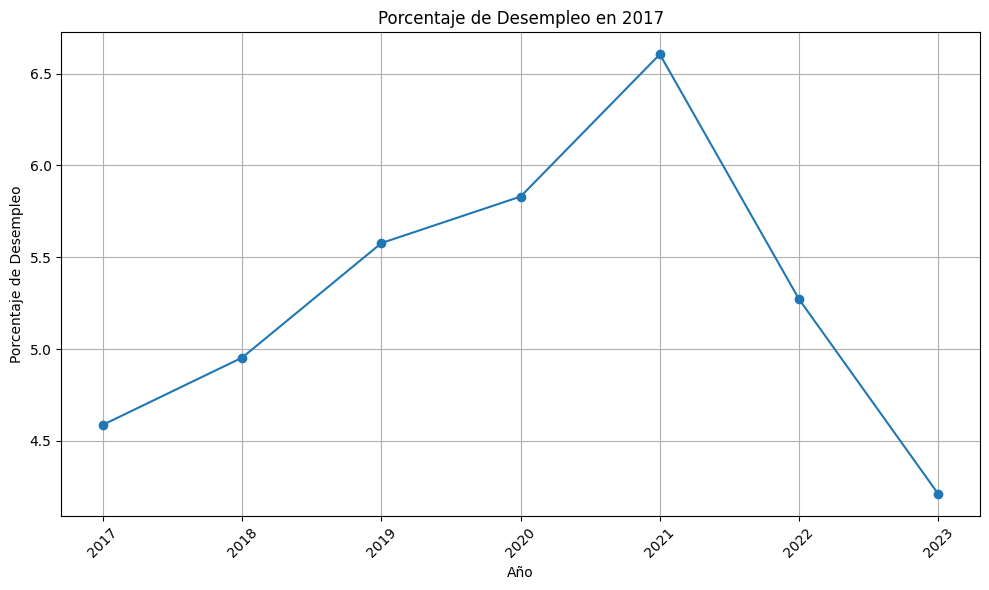

In [111]:
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# Calcular el porcentaje de desempleo
total_personas = len(datosEmpleo)
desempleados = datosEmpleo[(datosEmpleo['Desempleado'] == 1)].shape[0]
porcentaje_desempleo = (desempleados / total_personas) * 100

print(f"Porcentaje de desempleo entre 2017 y 2021: {porcentaje_desempleo:.2f}%")

# Crear un DataFrame para los porcentajes de desempleo por trimestre/mes
desempleo_tiempo = datosEmpleo.groupby('ID_AMO').apply(lambda x: (x['Desempleado'] == 1).mean() * 100).reset_index()
desempleo_tiempo.columns = ['ID_AMO', 'Porcentaje_Desempleo']

# Graficar la línea de tiempo
plt.figure(figsize=(10, 6))
plt.plot(desempleo_tiempo['ID_AMO'], desempleo_tiempo['Porcentaje_Desempleo'], marker='o')
plt.title(f'Porcentaje de Desempleo en {anoEspecifico}')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Desempleo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.xticks(desempleo_tiempo['ID_AMO'])

# Mostrar la gráfica
plt.show()